<a href="https://colab.research.google.com/github/ZakariaBOUZIT/random.datascience/blob/main/TP1_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scipy

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares
from matplotlib.pyplot import figure

### 1.GD 

In [3]:
#utilities
A = np.array([[10,0], [0,1]])

def f2Plot(x1,x2):
  return 5*x1**2 + 0.5*x2**2 - 3*(x1+x2)

def f2(x):
    return 5*x[0]**2 + x[1]**2/2 - 3*(x[0]+x[1])

def gradf2(x):
    return np.array([10*x[0]-3, x[1]-3])

min J =  -4.933985839233652


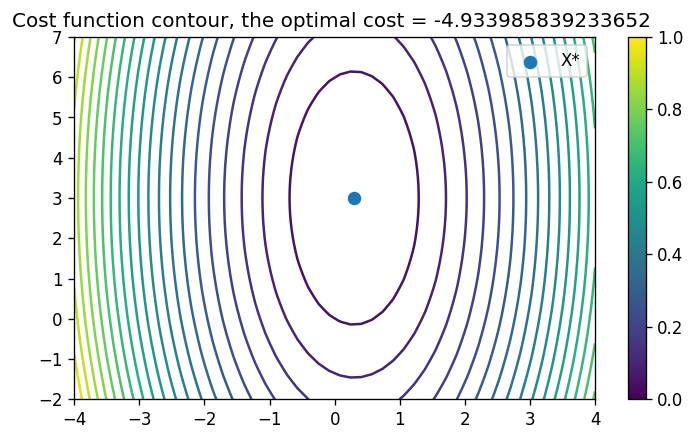

In [4]:
#trace contours
x1, x2 = np.meshgrid(np.linspace(-4,4,50), np.linspace(-2,7,50))
figure(figsize=(7, 4), dpi=120)
plt.contour(x1, x2, f2Plot(x1,x2), 20)
plt.scatter(3/10, 3, s = 50, label = 'X*')
plt.colorbar()
plt.title('Cost function contour, the optimal cost = -4.933985839233652 ')
plt.legend()
print('min J = ',np.min(f2Plot(x1,x2)))

In [5]:
#1
def constStepGD(x, stepSize, tol=1e-6, Niter=100):
    for i in range(Niter):
        condition = np.linalg.norm(gradf2(x[-1])) < tol
        if condition : 
          break 
        else :
          xnew = np.array([x[-1] - stepSize*gradf2(x[-1])])
          x = np.append(x,xnew, axis=0)
    return x,x[-1],i+1

In [6]:
x1 = np.array([[-6,6]])
x2 = np.array([[0,0]])
x3 = np.array([[-2,-7]])
N = 100
x_array1 , x_star1, _ = constStepGD(x1, stepSize = 0.1, tol=1e-6, Niter = N)
x_array2 , x_star2, _ = constStepGD(x2, stepSize = 0.1, tol=1e-6, Niter = N)
x_array3 , x_star3, _ = constStepGD(x3, stepSize = 0.1, tol=1e-6, Niter = N)
print('x* 1 : ', x_star1)
print('x* 2 : ', x_star2)
print('x* 3 : ', x_star3)

x* 1 :  [0.3        3.00007968]
x* 2 :  [0.3        2.99992032]
x* 3 :  [0.3        2.99973439]


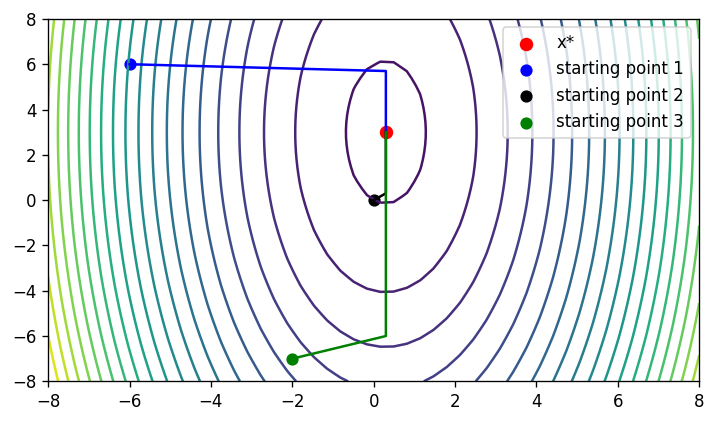

In [7]:
figure(figsize=(7, 4), dpi=120)
x1, x2 = np.meshgrid(np.linspace(-8,8,50), np.linspace(-8,8,50))
plt.contour(x1,x2,f2Plot(x1,x2), 20)
plt.plot(x_array1[:,0], x_array1[:,1], c = 'blue')
plt.plot(x_array2[:,0], x_array2[:,1], c = 'black')
plt.plot(x_array3[:,0], x_array3[:,1], c = 'green')
plt.scatter(0.3, 3, c = 'red', s = 50, label = 'x*')
plt.scatter(-6, 6, c = 'blue', s = 40, label = 'starting point 1')
plt.scatter(0, 0, c = 'black', s = 40, label = 'starting point 2')
plt.scatter(-2, -7, c = 'green', s = 40, label = 'starting point 3')
plt.legend()

In [8]:
#2
def optimalStepGD(x, stepSize, tol=1e-6, Niter=100):
    for i in range(Niter):
        condition = np.linalg.norm(gradf2(x[-1])) < tol
        if condition : 
          break 
        else :
          dk = -gradf2(x[-1])
          tk = -(np.dot(gradf2(x[-1]).transpose(), dk)) / (np.dot(np.dot(dk.transpose(), A), dk))    
          xnew = np.array([x[-1] + tk*dk])
          x = np.append(x,xnew, axis=0)
    return x,x[-1],i+1

In [9]:
x1 = np.array([[-6,6]])
x2 = np.array([[0,0]])
x3 = np.array([[-2,-7]])
N = 100
x_array1 , x_star1, _ = optimalStepGD(x1, stepSize = 0.1, tol=1e-6, Niter = N)
x_array2 , x_star2, _ = optimalStepGD(x2, stepSize = 0.1, tol=1e-6, Niter = N)
x_array3 , x_star3, _ = optimalStepGD(x3, stepSize = 0.1, tol=1e-6, Niter = N)
print('x* 1 : ', x_star1)
print('x* 2 : ', x_star2)
print('x* 3 : ', x_star3)

x* 1 :  [0.3        3.00000028]
x* 2 :  [0.30000006 2.99999942]
x* 3 :  [0.30000003 2.9999993 ]


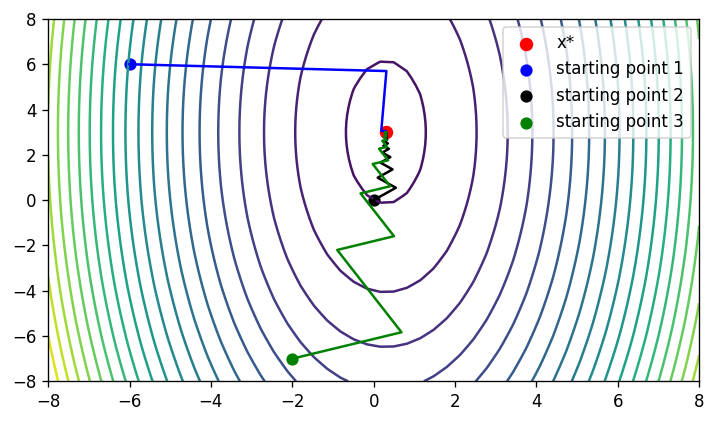

In [10]:
figure(figsize=(7, 4), dpi=120)
x1, x2 = np.meshgrid(np.linspace(-8,8,50), np.linspace(-8,8,50))
plt.contour(x1,x2,f2Plot(x1,x2), 20)
plt.plot(x_array1[:,0], x_array1[:,1], c = 'blue')
plt.plot(x_array2[:,0], x_array2[:,1], c = 'black')
plt.plot(x_array3[:,0], x_array3[:,1], c = 'green')
plt.scatter(0.3, 3, c = 'red', s = 50, label = 'x*')
plt.scatter(-6, 6, c = 'blue', s = 40, label = 'starting point 1')
plt.scatter(0, 0, c = 'black', s = 40, label = 'starting point 2')
plt.scatter(-2, -7, c = 'green', s = 40, label = 'starting point 3')
plt.legend()

In [11]:
#3
def conjGD(x, tol1=1e-6, Niter=100):
    d = -gradf2(x[-1])
    for i in range(Niter):
        condition = np.linalg.norm(gradf2(x[-1])) < tol1
        if condition :
            break 
        else : 
          grad = gradf2(x[-1])
          stepSizeOpt = -np.dot(grad.transpose(),d)/(np.dot(d.transpose(),np.dot(A,d)))
          xNext = np.array([x[-1] + stepSizeOpt*d])
          beta = (np.dot(np.dot(d.transpose(),A),gradf2(xNext[0])))/(np.dot(d.transpose(),np.dot(A,d)))
          d = -gradf2(xNext[0])+beta*d
          x = np.append(x,xNext, axis=0)
    return x, xNext

In [12]:
x1 = np.array([[-6,6]])
x2 = np.array([[0,0]])
x3 = np.array([[-2,-7]])
N = 100
x_array1 , x_star1 = conjGD(x1, tol1=1e-6, Niter = N)
x_array2 , x_star2 = conjGD(x2, tol1=1e-6, Niter = N)
x_array3 , x_star3 = conjGD(x3, tol1=1e-6, Niter = N)
print('x* 1 : ', x_star1)
print('x* 2 : ', x_star2)
print('x* 3 : ', x_star3)

x* 1 :  [[0.3 3. ]]
x* 2 :  [[0.3 3. ]]
x* 3 :  [[0.3 3. ]]


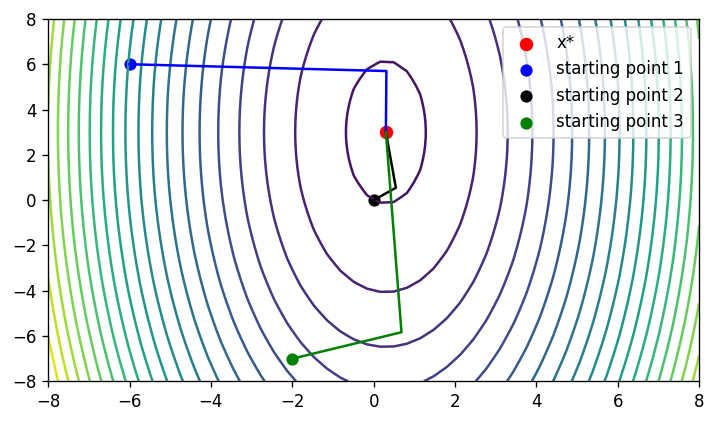

In [13]:
figure(figsize=(7, 4), dpi=120)
x1, x2 = np.meshgrid(np.linspace(-8,8,50), np.linspace(-8,8,50))
plt.contour(x1,x2,f2Plot(x1,x2), 20)
plt.plot(x_array1[:,0], x_array1[:,1], c = 'blue')
plt.plot(x_array2[:,0], x_array2[:,1], c = 'black')
plt.plot(x_array3[:,0], x_array3[:,1], c = 'green')
plt.scatter(0.3, 3, c = 'red', s = 50, label = 'x*')
plt.scatter(-6, 6, c = 'blue', s = 40, label = 'starting point 1')
plt.scatter(0, 0, c = 'black', s = 40, label = 'starting point 2')
plt.scatter(-2, -7, c = 'green', s = 40, label = 'starting point 3')
plt.legend()

In [14]:
x1 = 0.3
x2 = 3
'''
const step
x* 1 :  [0.3        3.00007968]
x* 2 :  [0.3        2.99992032]
x* 3 :  [0.3        2.99973439]
-------------------------------
optimal step
x* 1 :  [0.3        3.00000028]
x* 2 :  [0.30000006 2.99999942]
x* 3 :  [0.30000003 2.9999993 ]
'''
e11 = (0.3 - x1)**2 + (0.3 - x1)**2 + (0.3 - x1)**2 
e12 = (3.00007968 - x2)**2 + (2.99992032 - x2)**2 + (2.99973439 - x2)**2 
e21 = (0.3 - x1)**2 + (0.30000006 - x1)**2 + (0.30000003 - x1)**2 
e22 = (3.00000028 - x2)**2 + (2.99999942 - x2)**2 + (2.9999993 - x2)**2 
print('Const step')
print('error x1',e11)
print('error x2',e12)
print('-----------------')
print('Optimal step')
print('error x1',e21)
print('error x2',e22)

Const step
error x1 0.0
error x2 8.32464768999521e-08
-----------------
Optimal step
error x1 4.500000001924136e-15
error x2 9.048000003353652e-13


### 2.Robot triangulation

optimal solution :  [0.00013016 0.0004987 ]
Cost :  6.382278323213187e-13


(-1.1, 2.1)

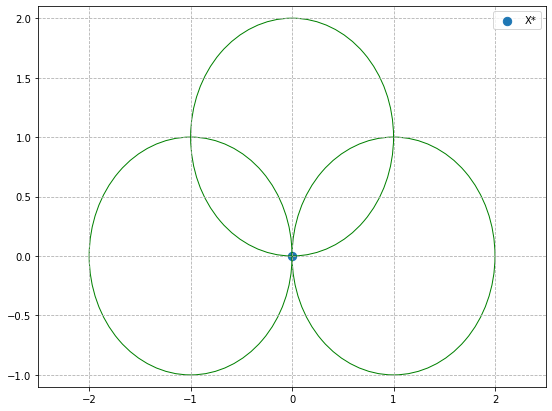

In [15]:
global x1, y1, d1, x2, y2, d2, x3, y3, d3 
x1 =-1; y1 = 0; d1 = 1
x2 = 1; y2 = 0; d2 = 1
x3 = 0; y3 = 1; d3 = 1

def J(theta):
  x = theta[0]
  y = theta[1]
  e1 = (x1 - x)**2 + (y1 - y)**2 - d1**2 
  e2 = (x2 - x)**2 + (y2 - y)**2 - d2**2
  e3 = (x3 - x)**2 + (y3 - y)**2 - d3**2
  return e1**2 + e2**2 + e3**2 

theta = [0.5, 0.5]
s = least_squares(J, theta)
print('optimal solution : ',s.x)
print('Cost : ',s.cost)

from matplotlib.pyplot import figure
circle1 = plt.Circle((x1, y1), d1, color='g', fill = False)
circle2 = plt.Circle((x2, y2), d2, color='g', fill = False)
circle3 = plt.Circle((x3, y3), d3, color='g', fill = False)
fig = plt.figure(figsize=(20, 7))
axes = fig.add_subplot(121)
axes.add_artist(circle1)
axes.add_artist(circle2)
axes.add_artist(circle3)
plt.scatter(s.x[0], s.x[1], s = 70, label = 'X*')
plt.legend()
plt.grid(linestyle='--')
plt.xlim([-2.5, 2.5])
plt.ylim([-1.1, 2.1])

optimal solution :  [-1.11927477e-07 -8.34688485e-01]
Cost :  0.9420806904991278


(-1.1, 3.1)

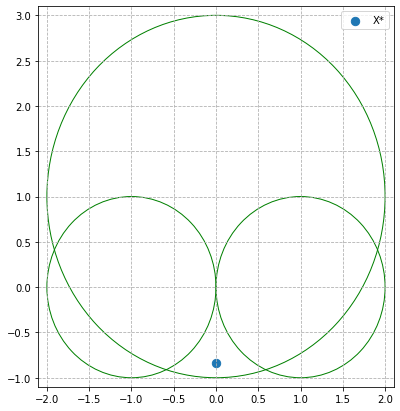

In [16]:
global x1, y1, d1, x2, y2, d2, x3, y3, d3 
x1 =-1; y1 = 0; d1 = 1
x2 = 1; y2 = 0; d2 = 1
x3 = 0; y3 = 1; d3 = 2

def J(theta):
  x = theta[0]
  y = theta[1]
  e1 = (x1 - x)**2 + (y1 - y)**2 - d1**2 
  e2 = (x2 - x)**2 + (y2 - y)**2 - d2**2
  e3 = (x3 - x)**2 + (y3 - y)**2 - d3**2
  return e1**2 + e2**2 + e3**2 

theta = [0.5, 0.5]
s = least_squares(J, theta)
print('optimal solution : ',s.x)
print('Cost : ',s.cost)

from matplotlib.pyplot import figure
circle1 = plt.Circle((x1, y1), d1, color='g', fill = False)
circle2 = plt.Circle((x2, y2), d2, color='g', fill = False)
circle3 = plt.Circle((x3, y3), d3, color='g', fill = False)
fig = plt.figure(figsize=(14, 7))
axes = fig.add_subplot(121)
axes.add_artist(circle1)
axes.add_artist(circle2)
axes.add_artist(circle3)
plt.scatter(s.x[0], s.x[1], s = 70, label = 'X*')
plt.legend()
plt.grid(linestyle='--')
plt.xlim([-2.1, 2.1])
plt.ylim([-1.1, 3.1])

### 3.RANSAC

In [17]:
import warnings
warnings.filterwarnings("ignore")

In [18]:
pip install pydataset --quiet

     |████████████████████████████████| 15.9 MB 3.6 MB/s 


In [19]:
import pandas as pd
from pydataset import data
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

initiated datasets repo at: /root/.pydataset/


In [61]:
df = data('tips')
X = df[['total_bill','sex','size','smoker','time']]
y = df['tip']
df.head(10)

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4
6,25.29,4.71,Male,No,Sun,Dinner,4
7,8.77,2.00,Male,No,Sun,Dinner,2
8,26.88,3.12,Male,No,Sun,Dinner,4
9,15.04,1.96,Male,No,Sun,Dinner,2
10,14.78,3.23,Male,No,Sun,Dinner,2


In [22]:
#Convert categorical variables to dummy variables
male = pd.get_dummies( X['sex'] )
X['male'] = male['Male']
smoker = pd.get_dummies( X['smoker'] )
X['smoker'] = smoker['Yes']
dinner = pd.get_dummies( X['time'] )
X['dinner'] = dinner['Dinner']
X = X.drop( ['sex','time'], 1 )
X.head(3)

,total_bill,size,smoker,male,dinner
1,16.99,2,0,0,1
2,10.34,3,0,1,1
3,21.01,3,0,1,1


In [69]:
y.head(3)

1    1.01
2    1.66
3    3.50
Name: tip, dtype: float64

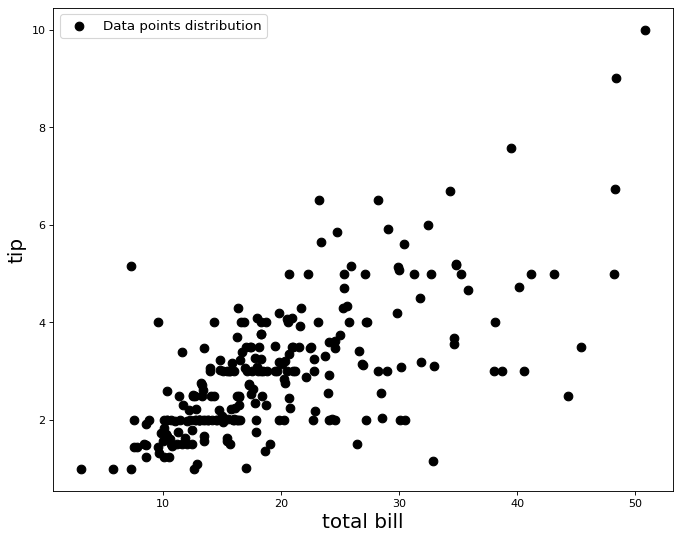

In [70]:
fig = plt.figure(figsize=(10, 8), dpi=80)
plt.scatter(X['total_bill'], y, c='black', s = 60, label = 'Data points distribution')
plt.xlabel('total bill', fontsize=18)
plt.ylabel('tip', fontsize=18)
plt.legend(fontsize=12)

In [34]:
#ransac
ransacReg1 = RANSACRegressor(LinearRegression(), residual_threshold=2, random_state = 42)
ransacReg1.fit( X[['total_bill']], y )
prediction1 = ransacReg1.predict(X[['total_bill']])

In [71]:
#least squares
A = np.vstack([X['total_bill'], np.ones(len(X['total_bill']))]).T
alpha = np.linalg.lstsq(A, y, rcond=None)[0]

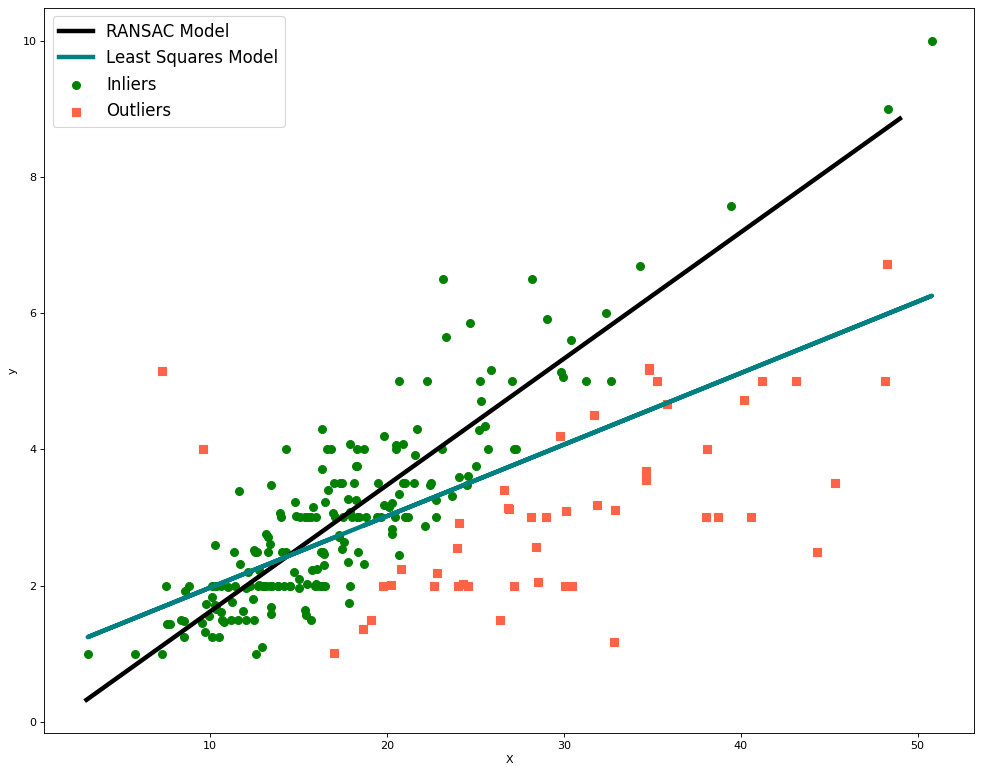

In [72]:
inlier = ransacReg1.inlier_mask_
outlier = np.logical_not(inlier)
line_X = np.arange(3,51,2)
line_y = ransacReg1.predict(line_X[:,np.newaxis])

fig = plt.figure(figsize=(15, 12), dpi=80)
plt.scatter(X[['total_bill']][inlier], y[inlier], c='green', marker='o', label='Inliers', s = 50)
plt.scatter(X[['total_bill']][outlier], y[outlier], c='tomato', marker='s', label='Outliers', s = 50)
plt.plot(line_X, line_y, color = 'black', label = 'RANSAC Model', linewidth = 4)
plt.plot(x, alpha[0]*x + alpha[1], color = 'teal', label = 'Least Squares Model', linewidth = 4)
plt.xlabel('X')
plt.ylabel('y')
plt.legend(prop={'size': 15})